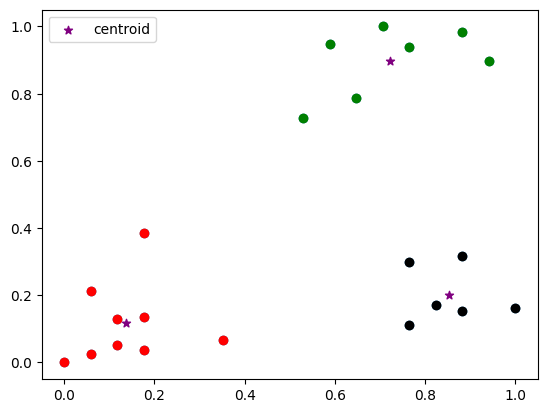

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("income.csv")

scaler = MinMaxScaler()

scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

plt.scatter(df.Age, df["Income($)"])

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

df["cluster"] = y_predicted

km.cluster_centers_

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1["Income($)"], color="green")
plt.scatter(df2.Age, df2["Income($)"], color="red")
plt.scatter(df3.Age, df3["Income($)"], color="black")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")
plt.legend()

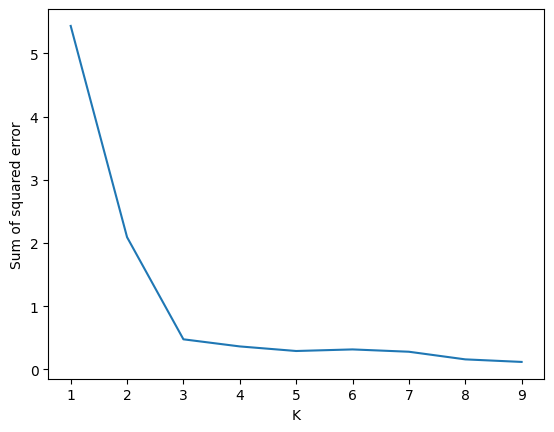

In [6]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
